# **Proyek Analisis Data Menggunakan Data Bike Sharing Dataset**

**Nama:** Rendy Ananta Kristanto<br>
**Email Dicoding:** 71220840@students.ukdw.ac.id<br>
**Username Dicoding:** @rendyanantakristanto

Menggunakan dataset Bike Sharing dari link: https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view

## **A. PERTANYAAN ANALISIS DATA**
Merupakan tahap untuk mendefinisikan pertanyaan untuk explorasi data.

**1. Pertanyaan Untuk Analisis Rumusan Masalah Analisis Bisnis Untuk Dataset.**

Dari sini saya dapat merumuskan 2 pertanyaan analisis bisnis mengenai dataset dari day.csv yaitu:

1. Apa hubungan antara hari kerja, hari libur, dan jumlah penyewaan sepeda? Apakah terdapat perbedaan yang signifikan?

2. Bagaimana hubungan penyewa sepeda dengan sepanjang musim dan cuaca? Apakah musim dan cuaca mempengaruhi jumlah penyewa sepeda?

---

# **B. DATA WRANGLING**

## **1. Tahap Gathering Data**
Merupakan tahap untuk mengecek isi dari semua dataset yang akan kita gunakan. Kita telah mendapatkan 2 dataset, yaitu day.csv dan hour.csv, yang akan kita coba buka terlebih dahulu untuk melihat berbagai macam parameter, lalu kita bisa menentukan pertanyaan yang bisa kita buat berdasarkan dataset kita.

Pertama kita lakukan import berbagai macam library berikut:



1. numpy = Untuk membuat dan mengolah multi-dimensional arrays.
2. pandas = Untuk memanipulasi dan menganalisis data.
3. matplotlib.pyplot = Untuk menampilkan visualisasi data.
4. seaborn = Untuk menampilkan visualisasi data secara atraktif dan informatif.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Setelah itu kita coba untuk mengecek isi dari masing-masing dataset, agar mengetahui parameter dan bagian apa saja yang bisa kita analisis dan cari permasalahannya.

Kita hanya akan menggunakan 1 dataset yaitu day.csv, yang merupakan jumlah sharing sepeda yang dikumpulkan setiap hari. Total 731 hari.



Kita akan membuat variabel day_df untuk menyimpan data day.csv, menggunakan read_csv().

Kita dapat menampilkan data berikut menggunakan head() yang akan menampilkan 5 baris pertama dari datanya. Berikut adalah hasil cek dataset day.csv tersebut:

In [4]:
day_df = pd.read_csv("https://raw.githubusercontent.com/RendyAnantaKristantoML78/Project-Analisis-Data-Python-Rendy-Ananta-Kristanto/refs/heads/main/submission/dashboard/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Dataset day.csv berisi informasi penyewaan sepeda secara harian.



Berikut adalah penjelasan mengenai masing-masing parameter dari sumber pemberi datasetnya.

---
Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


day.csv

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
---

In [5]:
day_df['cnt'].sum()

3292679

Berikut adalah total seluruh sewa sepeda.

Kita juga bisa langsung cek masing-masing parameter dengan jumlah dan data type masing-masing dataset menggunakan info()

# **2. Tahap Assesing Data**
Proses cek apakah ada data yang error, anomali, tidak normal, hilang, terduplikat, data kosong, dan lain-lain.

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dataset day.csv memiliki 731 baris dan 15 parameter.

Kita bisa mengecek lebih dalam menggunakan describe()

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kita cek apakah ada nilai NaN atau kosong di dataset kita menggunakan isna().

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Bisa kita lihat jika tidak ada data yang kosong.

Sekarang kita cek apakah ada data yang terduplikat atau tidak, menggunakan duplicated().

In [9]:
print('Jumlah data yang duplikat: ', day_df.duplicated().sum())

Jumlah data yang duplikat:  0


Bisa kita lihat tidak ada data yang terduplikat.

## **3. Tahap Cleaning Data**
Setelah melakukan Assesing Data, kita lanjut olah data kita kembali dengan cara dibersihkan agar sesuai dan tidak ada parameter atau baris yang berbeda dari mayoritas data, dan menghapus kesalahan input data atau jika ada yang error.


Sekarang kita coba cek tipe-tipe datanya menggunakan info().

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Bisa kita lihat jika bagian dteday yang seharusnya date, tetapi data type nya adalah object. Maka dari itu kita coba untuk ubah data type nya menjadi date menggunakan pd.to_datetime() seperti di bawah ini.

In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Setelah diubah, bisa kita lihat di bawah jika dteday sudah berubah menjadi tipe data datetime64[ns].

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Bisa kita lihat jika semua data sudah aman, karena sudah dicleaning. Data yang perlu dicleaning hanya pada parameter dteday yang awalnya data type adalah Object, diubah menjadi datetime64[ns].
<br><br>
Untuk data lain sudah aman, kita bisa lanjut ke tahap selanjutnya.

---

# **C. EXPLORATORY DATA ANALYSIS (EDA) & DATA VISUALIZATION**

Untuk melakukan eksplorasi lebih lanjut mengenai dataset yang sudah disiapkan, dan dicleaning, untuk mencari solusi dari pertanyaan analisis bisnis di awal.

---
### **Pertanyaan 1: Apa hubungan antara hari kerja, hari libur, dan jumlah penyewaan sepeda? Apakah terdapat perbedaan yang signifikan?**

**EDA**

Kita bisa cek terlebih dahulu mean dari count jumlah penyewa sepeda di holiday dan workingday, menggunakan cara seperti berikut:

In [14]:
holiday_sum_df = day_df[day_df['holiday'] == 1]['cnt']
workingday_sum_df = day_df[day_df['holiday'] == 0]['cnt']

holiday_sum_df_describe = holiday_sum_df.describe()
workingday_sum_df_describe = workingday_sum_df.describe()

print('='*30, f'\nHari Libur (holiday):\n{holiday_sum_df_describe}\n', '='*30)
print(f'Hari Kerja (workingday):\n{workingday_sum_df_describe}\n', '='*30)

Hari Libur (holiday):
count      21.00000
mean     3735.00000
std      2103.35066
min      1000.00000
25%      1951.00000
50%      3351.00000
75%      6034.00000
max      7403.00000
Name: cnt, dtype: float64
Hari Kerja (workingday):
count     710.000000
mean     4527.104225
std      1929.013947
min        22.000000
25%      3214.000000
50%      4558.000000
75%      5932.750000
max      8714.000000
Name: cnt, dtype: float64


Bisa kita lihat jika mean penyewaan sepeda pada hari kerja lebih tinggi daripada hari libur.

**Data Visualization**<br>
Kita coba untuk menampilkan visualisasi data antara jumlah penyewa sepeda di hari Kerja dan Libur.

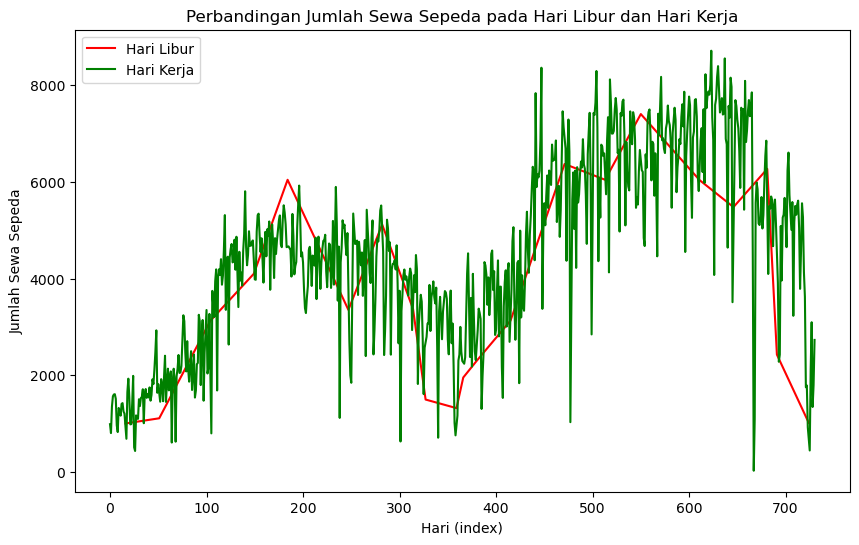

In [15]:

plt.figure(figsize=(10, 6))
plt.plot(holiday_sum_df, label='Hari Libur', color='red')
plt.plot(workingday_sum_df, label='Hari Kerja', color='green')

plt.title('Perbandingan Jumlah Sewa Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Hari (index)')
plt.ylabel('Jumlah Sewa Sepeda')

plt.legend()
plt.show()

Bisa kita lihat jika jumlah penyebaran jumlah penyewa sepeda di hari kerja lebih tinggi daripada hari libur.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_97276\2290037257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='cnt', data=day_df, palette='Set2')


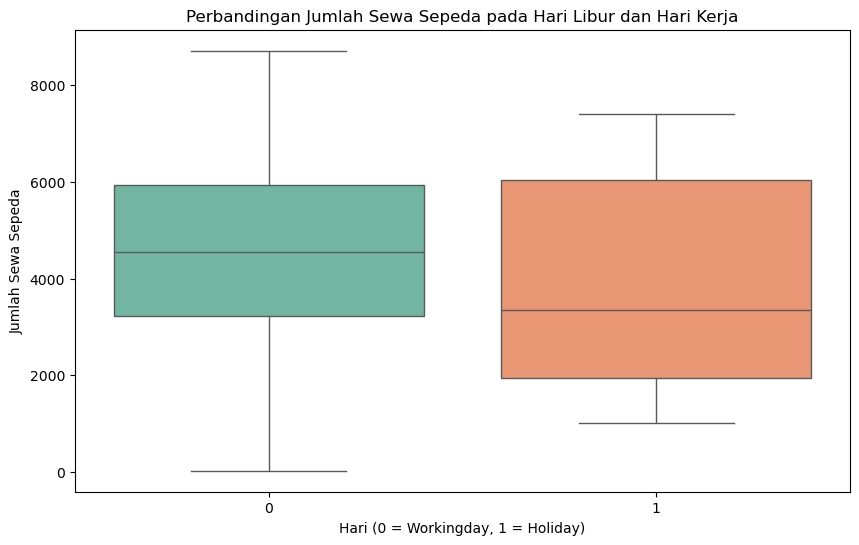

In [16]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='holiday', y='cnt', data=day_df, palette='Set2')

plt.title('Perbandingan Jumlah Sewa Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Hari (0 = Workingday, 1 = Holiday)')
plt.ylabel('Jumlah Sewa Sepeda')

plt.show()

Bisa kita lihat juga jika jumlah penyewaan sepeda lebih tinggi di hari kerja daripada di hari libur.

---

### **Pertanyaan 2: Bagaimana hubungan penyewa sepeda dengan sepanjang musim dan cuaca? Apakah musim dan cuaca mempengaruhi jumlah penyewa sepeda?**

**EDA**

Pertama kita bisa describe weathersit dan season.

In [17]:
weather_df = day_df.groupby('weathersit')['cnt'].describe()
season_df = day_df.groupby('season')['cnt'].describe()

print('='*80,f'\nCuaca (weathersit):\n',weather_df, f'\n\n', '='*80)
print(f'\nMusim (season)\n',season_df,f'\n','='*80)

Cuaca (weathersit):
             count         mean          std    min     25%     50%     75%  \
weathersit                                                                   
1           463.0  4876.786177  1879.483989  431.0  3636.5  4844.0  6458.5   
2           247.0  4035.862348  1809.109918  605.0  2674.5  4040.0  5257.5   
3            21.0  1803.285714  1240.284449   22.0   705.0  1817.0  2424.0   

               max  
weathersit          
1           8714.0  
2           8362.0  
3           4639.0   


Musim (season)
         count         mean          std     min     25%     50%      75%  \
season                                                                     
1       181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
2       184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
3       188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
4       178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

       

Bisa kita lihat jika weathersit ada 3 variabel, dan season memiliki 4 variabel, yang masing-masing variabel memiliki arti sebagai berikut dari file readme sumber datasetnya:

- season : season (1:springer, 2:summer, 3:fall, 4:winter)
+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


**Data Visualization**
Sekarang mari kita coba cek secara visual perbandingan antara jumlah sewa sepeda dengan cuaca dan musim.

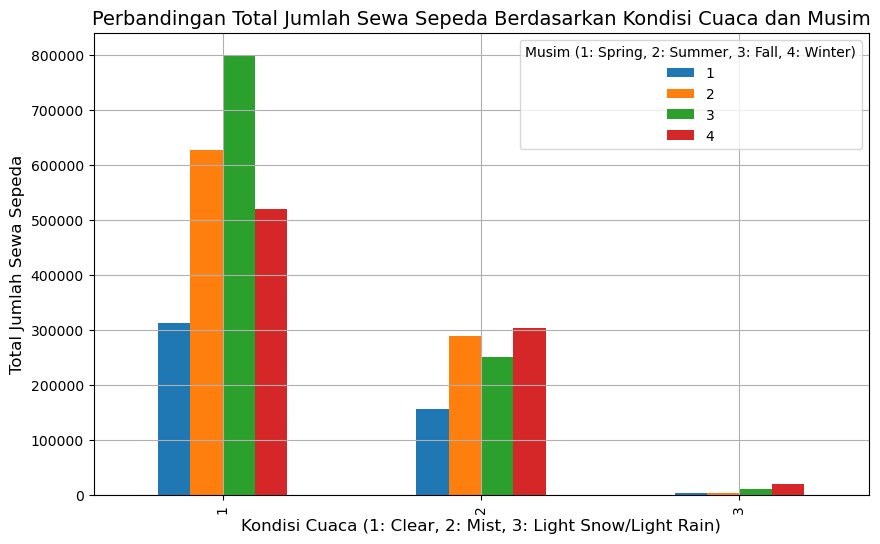

In [18]:
weather_season_grouped = day_df.groupby(['weathersit', 'season'])['cnt'].sum().unstack()

weather_season_grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Perbandingan Total Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca dan Musim', fontsize=14)
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Snow/Light Rain)', fontsize=12)
plt.ylabel('Total Jumlah Sewa Sepeda', fontsize=12)

plt.legend(title='Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)', fontsize=10)

plt.grid(True)
plt.show()

Bisa kita lihat jika dari data di atas, waktu musim dan cuaca yang jumlah sewa sepeda paling banyak ada di saat cuaca cerah (clear) dan saat musim gugur (fall).

Di saat cuaca berkabut (mist), jumlah sewa sepeda terbanyak adalah saat musim salju (winter).

Dan di saat cuaca bersalju ringan (light snow) / hujan ringan (light rain), jumlah sewa sepeda tertinggi ada di saat musim salju (winter).

Berikut adalah penampilan data yang sama menggunakan garis.

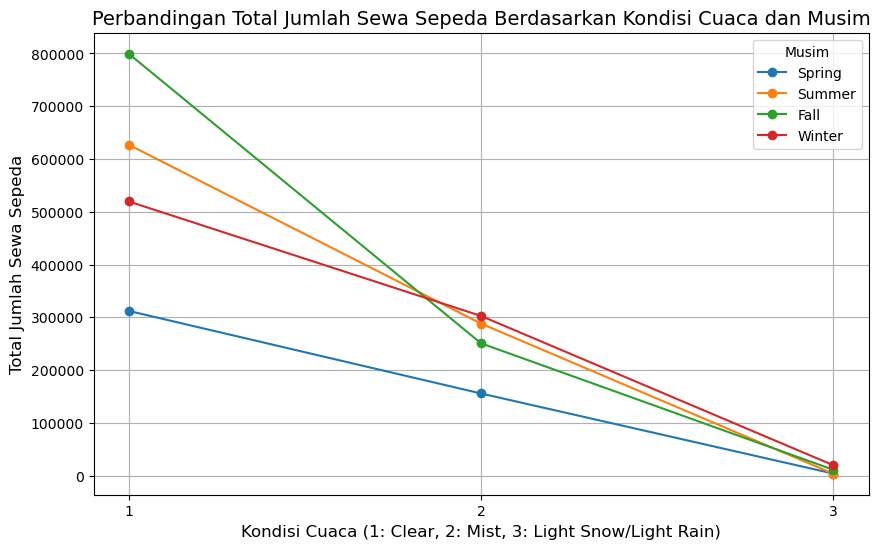

In [19]:

def musim(season):
  if season == 1:
    return 'Spring'
  elif season == 2:
    return 'Summer'
  elif season == 3:
    return 'Fall'
  elif season == 4:
    return 'Winter'
  else:
    return None

weather_season_grouped = day_df.groupby(['weathersit', 'season'])['cnt'].sum().unstack()

plt.figure(figsize=(10, 6))

for season in weather_season_grouped.columns:
    plt.plot(weather_season_grouped.index, weather_season_grouped[season], marker='o', label=f'{musim(season)}')

plt.title('Perbandingan Total Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca dan Musim', fontsize=14)
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Snow/Light Rain)', fontsize=12)
plt.ylabel('Total Jumlah Sewa Sepeda', fontsize=12)

plt.legend(title='Musim', fontsize=10)

plt.grid(True)
plt.xticks(weather_season_grouped.index)
plt.show()

Bisa dilihat juga jika jumlah sewa sepeda tertinggi sekitar 800000 terdapat di cuaca cerah (clear) dan saat musim gugur (fall).

Mengapa tidak ada cuaca ke-4? Karena di dataset tidak ada nilai 4 untuk weathersit. Berikut adalah kodenya, tidak ada yang weathersit 4.

In [20]:
weathersit_total = day_df.groupby('weathersit')['cnt'].sum()
print(weathersit_total)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


Sedangkan di parameter season, terdapat lengkap hingga 4. Berikut jumlahnya.

In [21]:
season_total = day_df.groupby('season')['cnt'].sum()
print(season_total)

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


---

# **D. KESIMPULAN**<br><br>


**1. Apa hubungan antara hari kerja, hari libur, dan jumlah penyewaan sepeda? Apakah terdapat perbedaan yang signifikan?**

Terdapat perbedaan yang signifikan, yang dimana jumlah sewa sepeda lebih tinggi di hari kerja daripada di hari libur, ini menandakan masih banyak orang yang datang kerja / melakukan aktifitas dengan menggunakan sepeda, sehingga dalam konteks bisnis, jumlah profit sewa sepeda akan lebih besar saat hari kerja.

<br>

**2. Bagaimana hubungan penyewa sepeda dengan sepanjang musim dan cuaca? Apakah musim dan cuaca mempengaruhi jumlah penyewa sepeda?**

Terdapat perbedaan juga, yang dimana jumlah sewa sepeda tertinggi adalah saat cuaca cerah di musim gugur, dan yang paling rendah keseluruhan adalah di cuaca salju ringan / hujan ringan. Jadi perusahaan dapat mempertimbangkan untuk menyewakan sepeda lebih banyak di cuaca cerah dan musim gugur karena banyak orang yang menyewa sepeda di saat tersebut.

**Nama:** Rendy Ananta Kristanto<br>
**Email Dicoding:** 71220840@students.ukdw.ac.id<br>
**Username Dicoding:** @rendyanantakristanto